# Feature Engineering for NLP in Python by Ninh Nguyen

In [1]:
import pandas as pd
from textatistic import Textatistic
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel


In [2]:
tweets = pd.read_csv('russian_tweets.csv')
tweets

,Unnamed: 0,content
0,127447,LIVE STREAM VIDEO=> Donald Trump Rallies in Co...
1,123642,Muslim Attacks NYPD Cops with Meat Cleaver. Me...
2,226970,.@vfpatlas well that's a swella word there (di...
3,138339,RT wehking_pamela: Bobby_Axelrod2k MMFlint don...
4,161610,Жители обстреливаемых районов Донецка проводят...
...,...,...
995,24329,How To Inspire People With Your Music! https:/...
996,315060,... https://t.co/AfWdTkKQlm
997,361901,Trevor Noah: Until we start treating racism li...
998,119948,SenSanders: RT SenJeffMerkley: We must act bol...


In [3]:
# Create a feature char_count
tweets['char_count'] = tweets['content'].apply(len)

# Print the average character count
print(tweets['char_count'].mean())


103.462


In [4]:
ted = pd.read_csv('ted.csv')
ted


,transcript,url
0,"We're going to talk — my — a new lecture, just...",https://www.ted.com/talks/al_seckel_says_our_b...
1,"This is a representation of your brain, and yo...",https://www.ted.com/talks/aaron_o_connell_maki...
2,It's a great honor today to share with you The...,https://www.ted.com/talks/carter_emmart_demos_...
3,"My passions are music, technology and making t...",https://www.ted.com/talks/jared_ficklin_new_wa...
4,It used to be that if you wanted to get a comp...,https://www.ted.com/talks/jeremy_howard_the_wo...
...,...,...
495,Today I'm going to unpack for you three exampl...,https://www.ted.com/talks/john_hodgman_design_...
496,Both myself and my brother belong to the under...,https://www.ted.com/talks/sheikha_al_mayassa_g...
497,John Hockenberry: It's great to be here with y...,https://www.ted.com/talks/tom_shannon_the_pain...
498,"What you're doing, right now, at this very mom...",https://www.ted.com/talks/nilofer_merchant_got...


In [5]:
# Function that returns number of words in a string
def count_words(string):
    # Split the string into words
    words = string.split()
    
    # Return the number of words
    return len(words)

# Create a new feature word_count
ted['word_count'] = ted['transcript'].apply(count_words)

# Print the average word count of the talks
print(ted['word_count'].mean())


1987.1


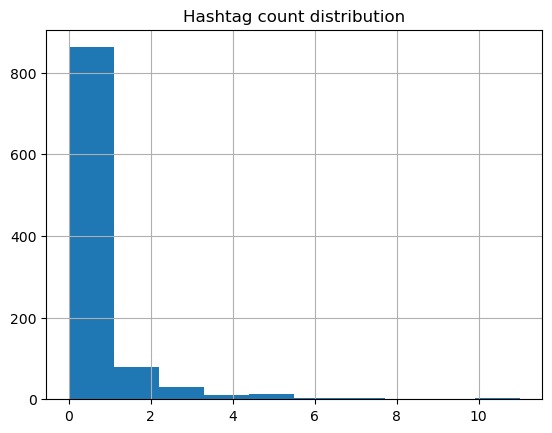

In [6]:
# Function that returns number of hashtags in a string
def count_hashtags(string):
    # Split the string into words
    words = string.split()
    
    # Create a list of words that are hashtags
    hashtags = [word for word in words if word.startswith('#')]
    
    # Return number of hashtags
    return(len(hashtags))

# Create a feature hashtag_count and display distribution
tweets['hashtag_count'] = tweets['content'].apply(count_hashtags)
tweets['hashtag_count'].hist()
plt.title('Hashtag count distribution')
plt.show()


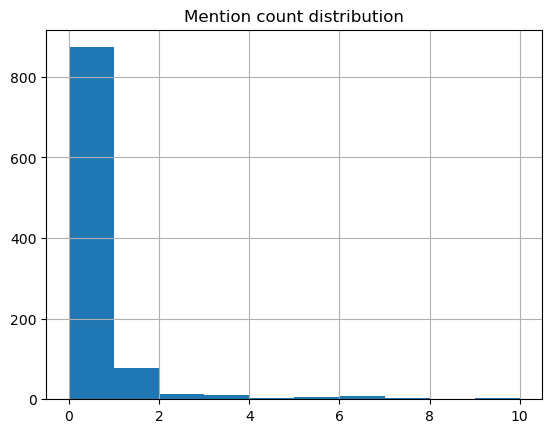

In [7]:
# Function that returns number of mentions in a string
def count_mentions(string):
    # Split the string into words
    words = string.split()
    
    # Create a list of words that are mentions
    mentions = [word for word in words if word.startswith('@')]
    
    # Return number of mentions
    return(len(mentions))

# Create a feature mention_count and display distribution
tweets['mention_count'] = tweets['content'].apply(count_mentions)
tweets['mention_count'].hist()
plt.title('Mention count distribution')
plt.show()


In [8]:
headlines = pd.read_csv('fakenews.csv')
headlines


,Unnamed: 0,title,label
0,0,You Can Smell Hillary’s Fear,FAKE
1,1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE
2,2,Kerry to go to Paris in gesture of sympathy,REAL
3,3,Bernie supporters on Twitter erupt in anger ag...,FAKE
4,4,The Battle of New York: Why This Primary Matters,REAL
...,...,...,...
95,95,The Mandela Effect was made by one overlooked ...,FAKE
96,96,CNN: One voter can make a difference by voting...,FAKE
97,97,Give Social Security recipients a CEO-style raise,REAL
98,98,"Fireworks erupt between Trump and Bush, Rubio ...",REAL


In [9]:
movies = pd.read_csv('movie_overviews.csv')
movies


,id,title,overview,tagline
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...
...,...,...,...,...
9094,159550,The Last Brickmaker in America,A man must cope with the loss of his wife and ...,NaN
9095,392572,Rustom,"Rustom Pavri, an honourable officer of the Ind...",Decorated Officer. Devoted Family Man. Defendi...
9096,402672,Mohenjo Daro,"Village lad Sarman is drawn to big, bad Mohenj...",NaN
9097,315011,Shin Godzilla,From the mind behind Evangelion comes a hit la...,A god incarnate. A city doomed.


In [10]:
# Create CountVectorizer object
vectorizer = CountVectorizer()

# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(movies)

# Print the shape of bow_matrix
print(bow_matrix.shape)


(4, 4)


In [11]:
# Create CountVectorizer object
vectorizer = CountVectorizer()

# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(movies)

# Convert bow_matrix into a DataFrame
bow_df = pd.DataFrame(bow_matrix.toarray())

# Map the column names to vocabulary 
bow_df.columns = vectorizer.get_feature_names_out()

# Print bow_df
print(bow_df)


   id  overview  tagline  title
0   1         0        0      0
1   0         0        0      1
2   0         1        0      0
3   0         0        1      0


In [12]:
# Generate n-grams upto n=1
vectorizer_ng1 = CountVectorizer(ngram_range=(1,1))
ng1 = vectorizer_ng1.fit_transform(movies)

# Generate n-grams upto n=2
vectorizer_ng2 = CountVectorizer(ngram_range=(1,2))
ng2 = vectorizer_ng2.fit_transform(movies)

# Generate n-grams upto n=3
vectorizer_ng3 = CountVectorizer(ngram_range=(1,3))
ng3 = vectorizer_ng3.fit_transform(movies)

# Print the number of features for each model
print("ng1, ng2 and ng3 have %i, %i and %i features respectively" % (ng1.shape[1], ng2.shape[1], ng3.shape[1]))


ng1, ng2 and ng3 have 4, 4 and 4 features respectively


In [13]:
# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix = vectorizer.fit_transform(ted)

# Print the shape of tfidf_matrix
print(tfidf_matrix.shape)


(3, 3)


In [14]:
# Initialize an instance of tf-idf Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Generate the tf-idf vectors for the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(movies)

# Compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)
print(cosine_sim)


[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [15]:
# Generate mapping between titles and index
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

def get_recommendations(title, cosine_sim, indices):
    # Get index of movie that matches title
    idx = indices[title]
    # Sort the movies based on the similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores for 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return metadata['title'].iloc[movie_indices]
